<p style="text-align: center;font-size: 40pt">Lie algebra</p>

In [2]:
%matplotlib widget
#%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


import numpy as np

import ipywidgets as widgets

%run ./scripts/helper_func.py
path = "{0}/lessons/transformations_2d/scripts/helper_func.py".format(get_root_path())
%run $path
path = "{0}/common/scripts/style.py".format(get_root_path())
%run $path

# Overview 

Requirements
- [Special Euclidean Group in 3D](5-lesson_se3.ipynb)

Objectives of this lesson:

- Explore ideas on how to teach Lie algebra.


Hidden custom latex commands here $ \curvearrowright$

----
[comment]: <> (General commands)
$\newcommand{\textcomma}{\quad\text{,}}$
$\newcommand{\textdot}{\quad\text{.}}$
$\newcommand{\vec}[1]{\overrightarrow{#1}}$
$\newcommand{\mat}[1]{\mathbf{#1}}$
$\newcommand{\frame}[1]{\mathcal{#1}}$
$\newcommand{\point}[2][]{{}^{#1}\mathbf{#2}}$
$\newcommand{\pointsym}[2][]{{}^{#1}\boldsymbol{#2}}$
$\newcommand{\matsym}[1]{\boldsymbol{#1}}$
$\newcommand{\real}{\mathbb{R}}$
$\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}$
$\newcommand{\F}[2][]{{}_{#2}^{#1}\mathscr{F}}$
$\newcommand{\Fmat}[2][]{{}_{#2}^{#1}\mat{F}}$
$\newcommand{\origin}[2][]{{}_{#2}^{#1}\mat{o}}$
$\newcommand{\T}[2][]{{}_{#2}^{#1}\mat{T}}$
$\newcommand{\t}[2][]{{}_{#2}^{#1}\mat{t}}$
$\newcommand{\R}[2][]{{}_{#2}^{#1}\mat{R}}$
$\newcommand{\f}{\vec{\mathscr{f}}}$
$\newcommand{\ax}[2][]{{}_{#2}^{#1}\vec{\mathscr{x}}}$
$\newcommand{\ay}[2][]{{}_{#2}^{#1}\vec{\mathscr{y}}}$
$\newcommand{\az}[2][]{{}_{#2}^{#1}\vec{\mathscr{z}}}$
$\newcommand{\aw}[2][]{{}_{#2}^{#1}\vec{\mathscr{w}}}$
$\newcommand{\axi}{\mathscr{x}}$
$\newcommand{\ayi}{\mathscr{y}}$
$\newcommand{\azi}{\mathscr{z}}$
$\newcommand{\awi}{\mathscr{w}}$
$\newcommand{\pointx}[2][]{{}^{#1}{#2}_{\axi}}$
$\newcommand{\pointy}[2][]{{}^{#1}{#2}_{\ayi}}$
$\newcommand{\pointz}[2][]{{}^{#1}{#2}_{\azi}}$
$\newcommand{\SO}[1]{\mathrm{SO}(#1)}$
$\newcommand{\SE}[1]{\mathrm{SE}(#1)}$
----

This lesson is under construction.
This is why it is considered as extra material and won't be covered by the exam.
My goal here is more about testing ideas on how to approach Lie algebra properly with students who wants to go even further.

# Approximating trigonometry functions

We will start with a small detour before addressing the main topic of this lesson.
When I was doing my undergraduate studies, I had to use a microcontroller in a control loop where trigonometry functions where not available.
I though that my project, which was about controlling a nanosatellite, was doomed until someone that I could implemented it myself using a Taylor series, which looks like this for the first four none zero terms

\begin{aligned}
\sin \theta & = \theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \frac{\theta^7}{7!} + \cdots \\
\cos \theta & = 1 - \frac{\theta^2}{2!} + \frac{\theta^4}{4!} - \frac{\theta^6}{6!} + \cdots 
\textdot
\end{aligned}

The general functions can be defined using a summation as follow

\begin{aligned}
\sin \theta 
& = \sum_{n=0}^\infty \frac{(-1)^n \theta^{2n+1}}{(2n+1)!} \\
\cos 
& = \sum_{n=0}^\infty \frac{(-1)^n \theta^{2n}}{(2n)!}
\textdot
\end{aligned}


# Approximation small angles

We can use those series to approximate small angles using the value $n$ as the order of approximation.
The following figure shows the implementation of those approximation when drawing a circle using the function

\begin{aligned}
x & = \cos \theta \\
y & = \sin \theta 
\textdot
\end{aligned}

Looking at the values close $\theta = 0$ (i.e., close to the large white dot), we can observed that even the approximation at order one is not too far.

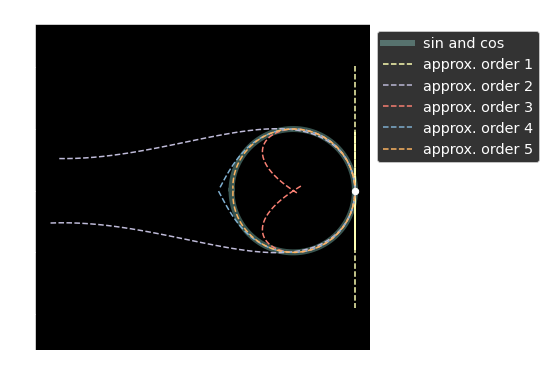

In [28]:
def approx_sin(theta, order):
    res = 0
    # approximation of sin at order one is considered to be theta, not zero
    for n in range(order+1):
        exp = 2*n+1
        res = res + (((-1)**n) * (theta**exp))/np.math.factorial(exp)
    return res

def approx_cos(theta, order):
    res = 0
    for n in range(order):
        exp = 2*n
        res = res + (((-1)**n) * (theta**exp))/np.math.factorial(exp)
    return res

theta = np.arange(-np.pi, np.pi, 0.05)
x = np.cos(theta)
y = np.sin(theta)



%matplotlib inline
    
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax = ax1
ax.set_title(r"Approximation of trigonomety functions")

ax.plot(x, y, lw=6, alpha=0.4)
legend_str = ["sin and cos"]

for i in range(5):
    order = i+1
    x_approx = approx_cos(theta, order)
    y_approx = approx_sin(theta, order)
    ax.plot(x_approx, y_approx, '--')
    legend_str.append("approx. order %i" % order)

ax.scatter(1, 0, color="white", s=40, zorder=3)
ax.axis('equal')
ax.legend(legend_str, bbox_to_anchor=(1, 1))

Let's recall the equations for principal rotation as follow

\begin{aligned}
\R{}_\axi (\alpha)
= \bmat{ 
1 & 0 & 0
\\
0 & \cos \alpha & -\sin \alpha
\\ 
0 & \sin \alpha & \cos \alpha
\\
}
\quad
\R{}_\ayi (\beta)
= \bmat{ 
\cos \beta & 0 & \sin \beta
\\ 
0 & 1 & 0
\\
-\sin \beta & 0 & \cos \beta
\\
}
\quad
\R{}_\azi (\gamma)
= \bmat{ 
\cos \gamma & -\sin \gamma & 0
\\
\sin \gamma & \cos \gamma & 0
\\ 
0 & 0 & 1
\\
}
\textcomma
\end{aligned}

which can be approximated using a first order Taylor expansion using

\begin{aligned}
\R{}_\axi (\alpha)
\approx \bmat{ 
1 & 0 & 0
\\
0 & 1 & -\alpha
\\ 
0 & \alpha & 1
\\
}
\quad
\R{}_\ayi (\beta)
\approx \bmat{ 
1 & 0 & \beta
\\ 
0 & 1 & 0
\\
-\beta & 0 & 1
\\
}
\quad
\R{}_\azi (\gamma)
\approx \bmat{ 
1 & -\gamma & 0
\\
\gamma & 1 & 0
\\ 
0 & 0 & 1
\\
}
\textdot
\end{aligned}

This approximation start to be interesting as we can express a small rotation matrix $\hat{\R{}}$ as a linear combination of three angles, such that

\begin{aligned}
\hat{\R{}} &= \R{}_\axi (\alpha) \R{}_\ayi (\beta) \R{}_\azi (\gamma)
\\
&=
\bmat{ 
1 & 0 & 0
\\
0 & 1 & -\alpha
\\ 
0 & \alpha & 1
\\
}
\bmat{ 
1 & 0 & \beta
\\ 
0 & 1 & 0
\\
-\beta & 0 & 1
\\
}
\bmat{ 
1 & -\gamma & 0
\\
\gamma & 1 & 0
\\ 
0 & 0 & 1
\\
}
\\
&=
\bmat{ 
1 & -\gamma & \beta
\\
\gamma & 1 & -\alpha
\\ 
-\beta & \alpha & 1
\\
}
\textcomma
\end{aligned}

meaning that the order of rotations, which was causing a lot of convention for the Euler angles, doesn't matter any more for small angles.
More explicitly, this observation means

\begin{aligned}
\hat{\R{}} 
&= \R{}_\axi (\alpha) \R{}_\ayi (\beta) \R{}_\azi (\gamma)
\\
&= \R{}_\ayi (\alpha) \R{}_\azi (\beta) \R{}_\axi (\gamma)
\\
&= \R{}_\axi (\alpha) \R{}_\azi (\beta) \R{}_\ayi (\gamma)
\\
&= \cdots
\textdot
\end{aligned}

We further simply this equation by defining $\matsym{\theta} = \bmat{\alpha & \beta & \gamma}^T$, so we can write

\begin{aligned}
\hat{\R{}} &=
\bmat{ 
1 & -\gamma & \beta
\\
\gamma & 1 & -\alpha
\\ 
-\beta & \alpha & 1
\\
}
\\
&=
\bmat{ 
1 & 0 & 0
\\
0 & 1 & 0
\\ 
0 & 0 & 1
\\
}
+
\bmat{ 
0 & -\gamma & \beta
\\
\gamma & 0 & -\alpha
\\ 
-\beta & \alpha & 0
\\
}
\\
& = \mat{I} + [\matsym{\theta}]_\times
\textcomma
\end{aligned}

We have seem similar terms using cross products before.
If we show again the Rodrigues' rotation formula shown in the axis-angle lesson, we see that

\begin{aligned}
\R{} = (\cos \theta) \mat{I} + (\sin \theta) {[\mat{e}]}_{\times} + (1 - \cos \theta) \mat{e}^{} \mat{e}^T
\textcomma
\end{aligned}

which can be also simply using the small angle approximation to 

\begin{aligned}
\R{} &\approx \mat{I} + \theta {[\mat{e}]}_{\times}
\\
& = \mat{I} + [\matsym{\theta}]_\times
\textdot
\end{aligned}

Nice!
Let's move on to more complex stuff.

# Lie groups

So far, we have seen two groups, the special orthogonal group $\SO{3}$ and the special Euclidean group $\SE{3}$.
This is basic, both you also know what is a **vector space**, because we were using it through two modules without explicitly name it.
In short, given two vectors $\vec{a}$ and $\vec{b}$, you should know how to add them (e.g., $\vec{a} + \vec{b} = \vec{b} + \vec{a}$) and multiply them with a scalar $c$ (e.g., $c(\vec{a} + \vec{b}) = c\vec{b} + c\vec{a}$).
We also have seen that we would like to express rotation and translation parameters in a single vector, but we cannot.

Knowing that, it turns out that both $\SO{3}$ and $\SE{3}$ fulfill a set of properties necessary to be part of a larger group called **Lie groups**.
The good thing about being part of this group is that we now have access to a new tool called **Lie algebra**, which allows use to generate a vector space from any Lie group.
Watch out, here comes the gothic letters...

Vector spaces associated to $\SO{3}$ and $\SE{3}$ will be named respectivelly $\mathfrak{so}(3)$ and $\mathfrak{se}(3)$.
We are looking for mapping functions that will allow use to convert from a group to a vector space, such that

\begin{aligned}
\SO{3} \longleftrightarrow \mathfrak{so}(3) \phantom{\textdot}
\\
\SE{3} \longleftrightarrow \mathfrak{se}(3)
\textdot
\end{aligned}

It turns out that those mapping functions are the exponential $\exp(\cdot)$ and the natural logarithm functions $\ln(\cdot)$, such that

\begin{gather}
\SO{3} \xrightarrow{\exp(\cdot)} \mathfrak{so}(3) \phantom{\textcomma}
\\
\SO{3} \xleftarrow{\ln(\cdot)} \mathfrak{so}(3)
\textcomma
\end{gather}

with the special note that those functions are called on matrices.

To be continued...